In [1]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [2]:
ls

MyDrive/  Shareddrives/


In [3]:
cd /gdrive/MyDrive/Wine quality testing

/gdrive/MyDrive/Wine quality testing


In [4]:
ls

catboost_info/  WineQT.csv


# Importing Libraries

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier as rf
import warnings
warnings.filterwarnings("ignore")

# Uploading Dataset

In [76]:
df=pd.read_csv('WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [78]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


# EDA

In [79]:
df.isna().sum().sum()

0

In [80]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [81]:
df.quality.value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [82]:
columns = df.columns
binary_cols = []

for col in columns:
    if df[col].value_counts().shape[0] == 2:
        binary_cols.append(col)

In [83]:
binary_cols

[]

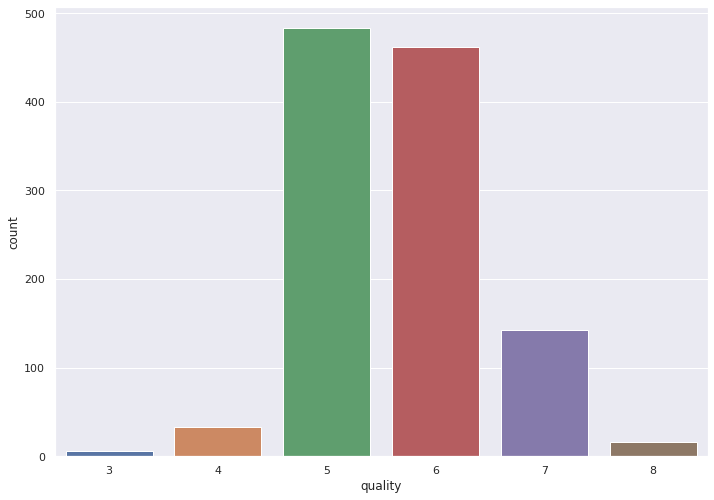

In [84]:
sns.countplot("quality", data=df)

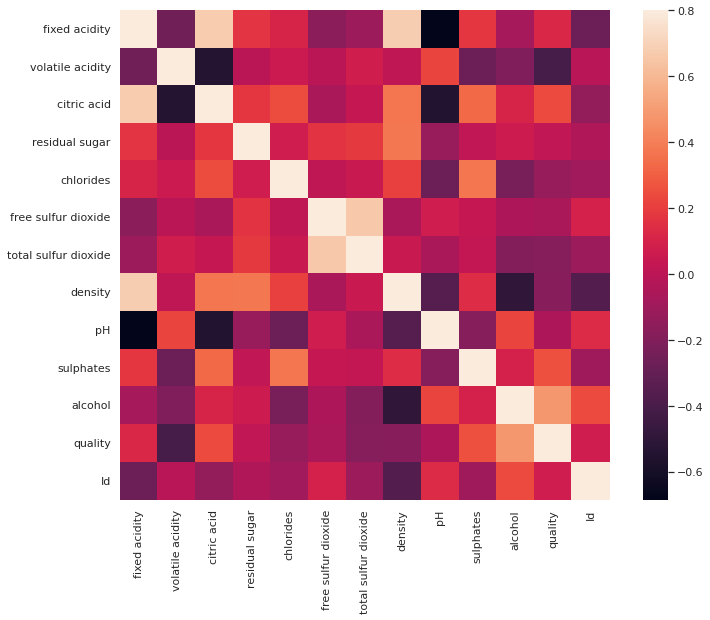

In [85]:
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

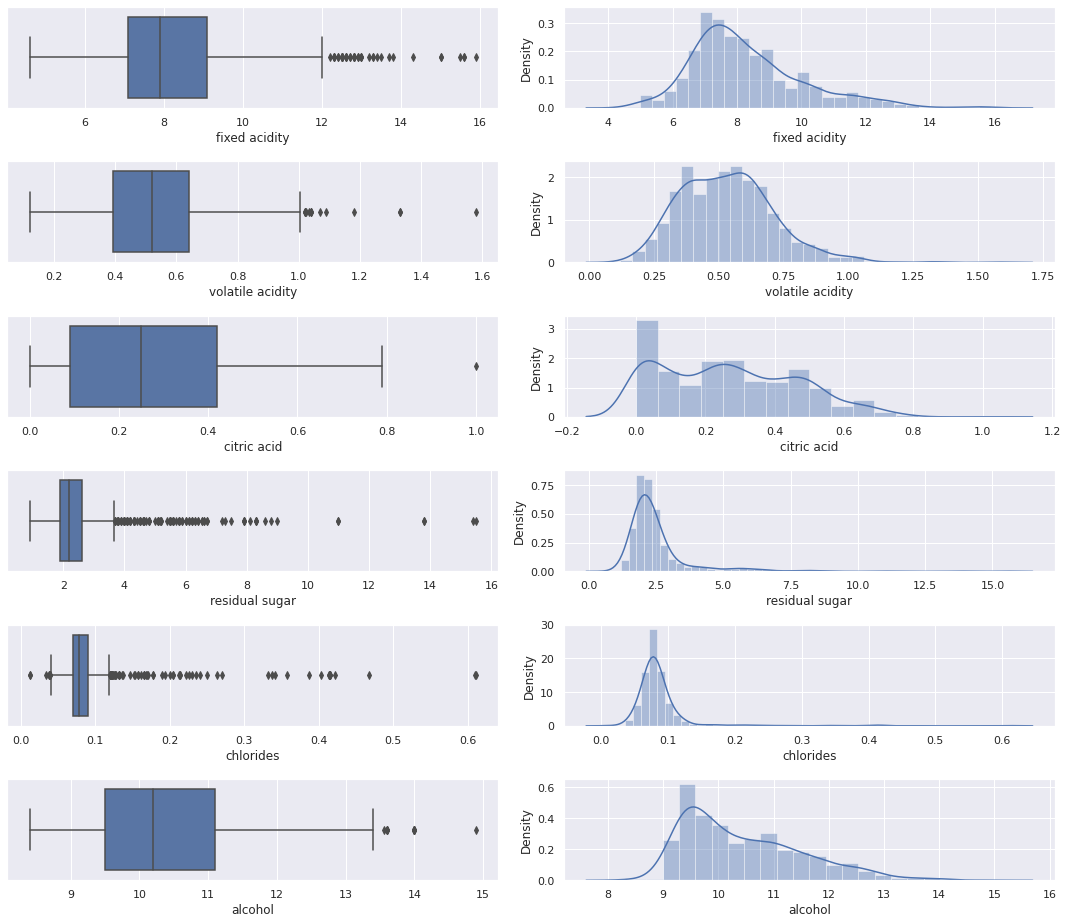

In [86]:
fig, ax = plt.subplots(6, 2, figsize = (15, 13))
sns.boxplot(x= df["fixed acidity"], ax = ax[0,0])
sns.distplot(df['fixed acidity'], ax = ax[0,1])
sns.boxplot(x= df["volatile acidity"], ax = ax[1,0])
sns.distplot(df['volatile acidity'], ax = ax[1,1])
sns.boxplot(x= df["citric acid"], ax = ax[2,0])
sns.distplot(df['citric acid'], ax = ax[2,1])
sns.boxplot(x= df["residual sugar"], ax = ax[3,0])
sns.distplot(df['residual sugar'], ax = ax[3,1])
sns.boxplot(x= df["chlorides"], ax = ax[4,0])
sns.distplot(df['chlorides'], ax = ax[4,1])
sns.boxplot(x= df["alcohol"], ax = ax[5,0])
sns.distplot(df['alcohol'], ax = ax[5,1])
plt.tight_layout()

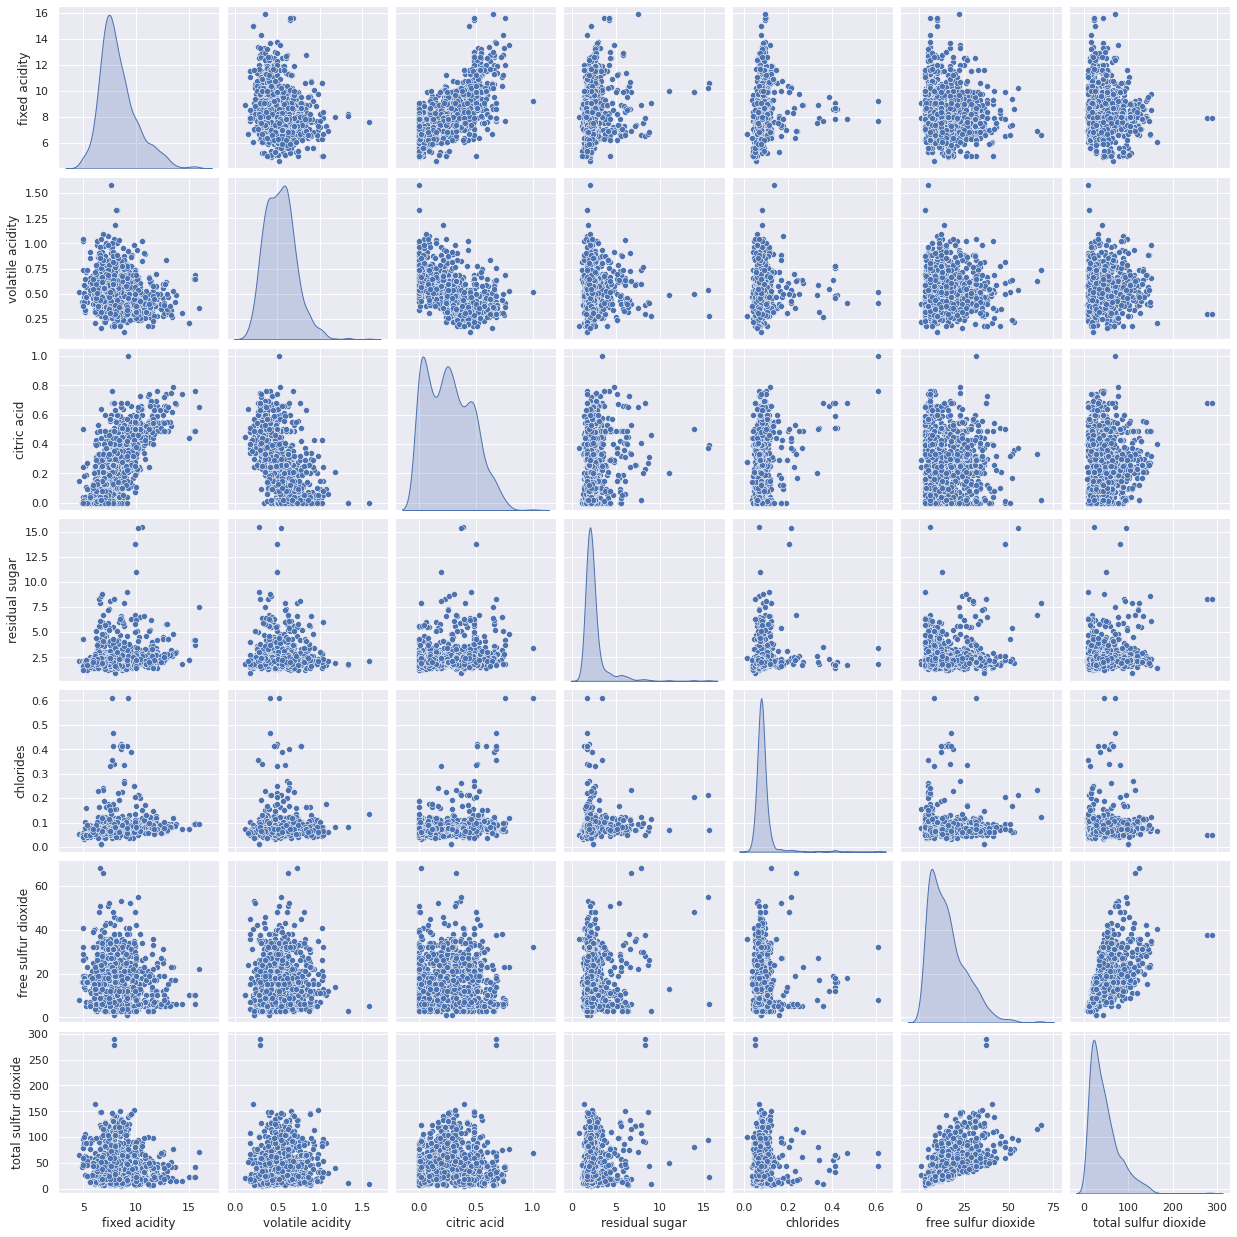

In [87]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
cData_attr = df.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde')   

Text(0, 0.5, 'alcohol')

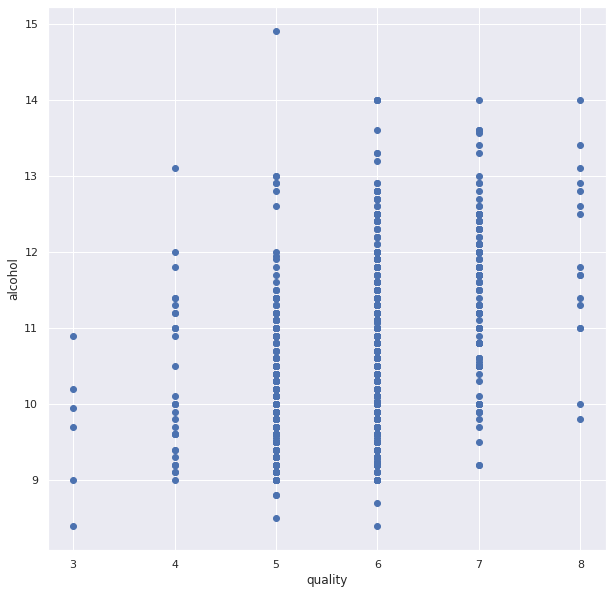

In [88]:
plt.figure(figsize=(10,10))
plt.scatter(x='quality',y='alcohol',data=df)
plt.xlabel('quality')
plt.ylabel('alcohol')

In [89]:
X = df.drop(['quality','Id'], axis = 1)
Y = df["quality"]
x_Data = X.values
y_Data = Y.values

In [90]:
from sklearn.model_selection import train_test_split


In [91]:
X_train, X_test, y_train, y_test = train_test_split(x_Data, y_Data, test_size = 0.2, random_state = 42)

# Naive Bayes

In [92]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [93]:
model.score(X_test,y_test)

0.5807860262008734

In [94]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(GaussianNB(),X_train, y_train, cv=5))

[0.4863388  0.55737705 0.55191257 0.54098361 0.48351648]


In [95]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [96]:
pred = model.predict(X_train) 
accuracy_score(y_train, pred)

0.5492341356673961

In [97]:
confusion_matrix(y_train, pred)

array([[  1,   0,   3,   2,   0,   0],
       [  0,   4,  13,   9,   1,   0],
       [  2,  13, 209, 150,  12,   1],
       [  2,   7,  71, 229,  50,   4],
       [  0,   1,   5,  46,  56,   9],
       [  0,   0,   0,   5,   6,   3]])

In [98]:
predicted_test = model.predict(X_test)
p=accuracy_score(y_test, predicted_test)

In [99]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [100]:
print(classification_report(y_test, predicted_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         6
           5       0.74      0.52      0.61        96
           6       0.57      0.69      0.62        99
           7       0.50      0.58      0.54        26
           8       0.00      0.00      0.00         2

    accuracy                           0.58       229
   macro avg       0.30      0.30      0.29       229
weighted avg       0.61      0.58      0.59       229



In [101]:
cma = confusion_matrix(y_test, predicted_test)

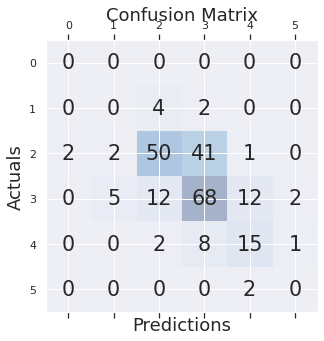

In [102]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Random forest Classifier

In [103]:
clf_forest = rf(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [104]:
pred = clf_forest.predict(X_train)
accuracy_score(y_train, pred)

0.9770240700218819

In [105]:
confusion_matrix(y_train, pred)

array([[  5,   0,   1,   0,   0,   0],
       [  0,  24,   3,   0,   0,   0],
       [  0,   0, 382,   5,   0,   0],
       [  0,   0,   3, 360,   0,   0],
       [  0,   0,   1,   8, 108,   0],
       [  0,   0,   0,   0,   0,  14]])

In [106]:
pred_test = clf_forest.predict(X_test)
q=accuracy_score(y_test, pred_test)

In [107]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [108]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.73      0.78      0.75        96
           6       0.66      0.69      0.67        99
           7       0.70      0.62      0.65        26
           8       0.00      0.00      0.00         2

    accuracy                           0.69       229
   macro avg       0.42      0.42      0.42       229
weighted avg       0.67      0.69      0.68       229



In [109]:
cma = confusion_matrix(y_test, pred_test)

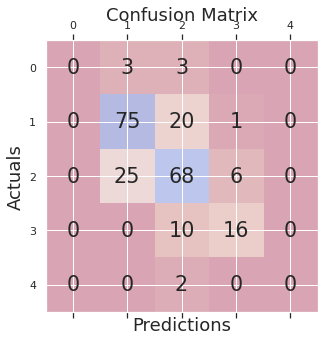

In [110]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Decision Tree Classifier

In [111]:
from sklearn import tree


In [112]:
 clf = tree.DecisionTreeClassifier()
 clf = clf.fit(X_train, y_train)

In [113]:
pred1 = clf.predict(X_train)
accuracy_score(y_train, pred1)

1.0

In [114]:
confusion_matrix(y_train, pred1)

array([[  6,   0,   0,   0,   0,   0],
       [  0,  27,   0,   0,   0,   0],
       [  0,   0, 387,   0,   0,   0],
       [  0,   0,   0, 363,   0,   0],
       [  0,   0,   0,   0, 117,   0],
       [  0,   0,   0,   0,   0,  14]])

In [115]:
pred1_test = clf.predict(X_test)
r=accuracy_score(y_test, pred1_test)

In [116]:
print(classification_report(y_test, pred1_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.10      0.17      0.12         6
           5       0.61      0.61      0.61        96
           6       0.54      0.48      0.51        99
           7       0.43      0.50      0.46        26
           8       0.00      0.00      0.00         2

    accuracy                           0.53       229
   macro avg       0.28      0.29      0.29       229
weighted avg       0.54      0.53      0.53       229



In [117]:
cma = confusion_matrix(y_test, pred1_test)

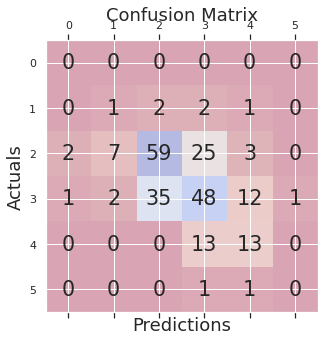

In [118]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Logistic Regression

In [119]:
from sklearn.linear_model import LogisticRegression  
clf= LogisticRegression(random_state=0)  
clf.fit(X_train, y_train)  

LogisticRegression(random_state=0)

In [120]:
pred_LR= clf.predict(X_train)
accuracy_score(y_train, pred_LR)

0.5831509846827133

In [121]:
confusion_matrix(y_train, pred_LR)

array([[  0,   0,   6,   0,   0,   0],
       [  0,   0,  19,   7,   1,   0],
       [  0,   1, 292,  93,   1,   0],
       [  0,   0, 124, 235,   4,   0],
       [  0,   0,   8, 103,   6,   0],
       [  0,   0,   0,  13,   1,   0]])

In [122]:
pred_LR_test = clf.predict(X_test)
s=accuracy_score(y_test, pred_LR_test)

In [123]:
print(classification_report(y_test, pred_LR_test))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.65      0.75      0.70        96
           6       0.59      0.68      0.63        99
           7       0.50      0.12      0.19        26
           8       0.00      0.00      0.00         2

    accuracy                           0.62       229
   macro avg       0.35      0.31      0.30       229
weighted avg       0.59      0.62      0.59       229



In [124]:
cma = confusion_matrix(y_test, pred_LR_test)

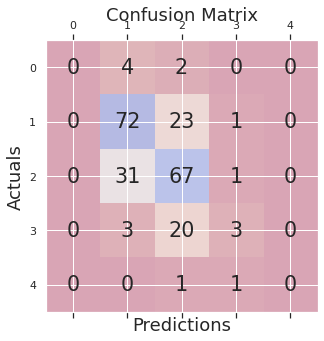

In [125]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Support Vector Machine

In [126]:
from sklearn.svm import SVC  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, y_train)  

SVC(kernel='linear', random_state=0)

In [127]:
pred_SVM= classifier.predict(X_train)
accuracy_score(y_train, pred_SVM)

0.5842450765864332

In [128]:
confusion_matrix(y_train, pred_SVM)

array([[  0,   0,   6,   0,   0,   0],
       [  0,   0,  19,   8,   0,   0],
       [  0,   0, 307,  80,   0,   0],
       [  0,   0, 136, 227,   0,   0],
       [  0,   0,   7, 110,   0,   0],
       [  0,   0,   0,  14,   0,   0]])

In [129]:
pred_SVM_test = classifier.predict(X_test)
t=accuracy_score(y_test, pred_SVM_test)

In [130]:
print(classification_report(y_test, pred_SVM_test))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.66      0.77      0.71        96
           6       0.56      0.67      0.61        99
           7       0.00      0.00      0.00        26
           8       0.00      0.00      0.00         2

    accuracy                           0.61       229
   macro avg       0.24      0.29      0.26       229
weighted avg       0.52      0.61      0.56       229



In [131]:
cma = confusion_matrix(y_test, pred_SVM_test)

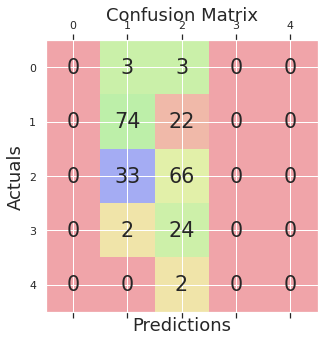

In [132]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="prism", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Comparative predicting

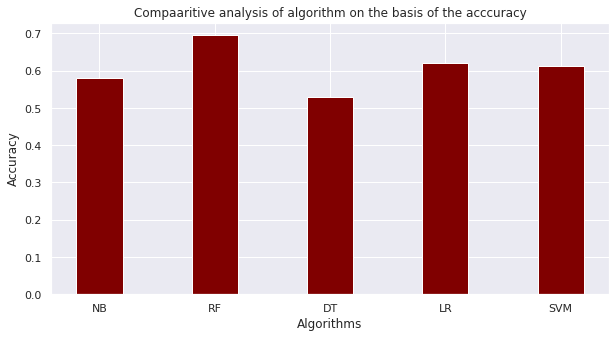

In [133]:
import numpy as np
import matplotlib.pyplot as plt
# creating the dataset
data = {'NB':p, 'RF':q, 'DT':r,'LR':s,'SVM':t}
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(courses, values, color ='maroon',
		width = 0.4)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Compaaritive analysis of algorithm on the basis of the acccuracy")
plt.show()


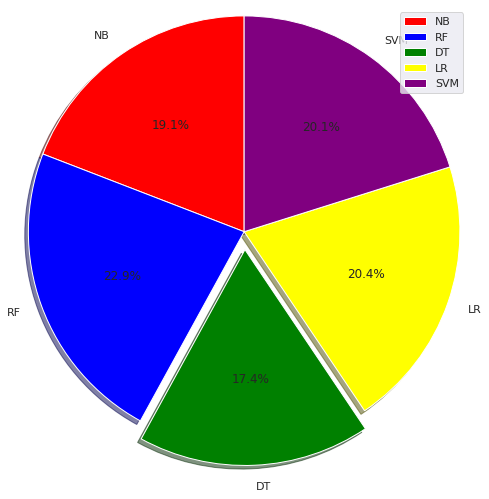

In [134]:
activities = ['NB', 'RF', 'DT', 'LR','SVM'] 
# portion covered by each label
slices = [p,q,r,s,t]
 
# color for each label
colors = ['red', 'blue', 'green','yellow','purple']
 
# plotting the pie chart
plt.pie(slices, labels = activities, colors=colors,
        startangle=90, shadow = True, explode = (0, 0, 0.1,0,0),
        radius = 1.2, autopct = '%1.1f%%')
 
# plotting legend
plt.legend()
 
# showing the plot
plt.show()